## **Simple Linear Regression Using Matrix-Form Equations:**

#### **`Step 1`: Start with the General Line Equation:**

I begin with the familiar linear equation for a single variable:

> \[$y = \theta_0 + \theta_1 x$\]

it's just a line with:

- \( $\theta_0$ \): y-intercept
- \($ \theta_1$ \): slope
- \( $x $\): input (independent variable)

#### **`Step 2`: Convert to Matrix Form:**

Rewrite the equation for all \( $n$ \) data points compactly in **matrix form**:

> \[$\mathbf{y} = \mathbf{X} \boldsymbol{\theta}$\]

Where:

- \( $\mathbf{y}$ \): a column vector of target values  
- \( $\mathbf{X}$ \): matrix of input data (design matrix)  
- \( $\boldsymbol{\theta}$ \): a column vector of parameters (\( $\theta_0$ \) and \( $\theta_1$ \))

##### This expands to:

> \[$\begin{bmatrix}y_1 \\y_2 \\ \vdots \\y_n\end{bmatrix} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \cdot \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$\]

Each row of \($ \mathbf{X} $\) corresponds to a training example, and the first column of all ones is there to multiply with \( $\theta_0 $\) (bias).

#### **`Step 3`: Define the Matrices from the Data:**

Let's assume we have this dataset:

In [33]:
x_values = [1, 2, 3, ..., 20]     # 20 values
y_values = [3, 4, 2, ..., 22]     # 20 corresponding outputs

Now, design matrix \( $\mathbf{X}$ \) (shape: $20 × 2$):

Each row will be `[1, x_i]`:

```python
X = [
    [1, x1],
    [1, x2],
    ...
    [1, x20]
]
```

In [34]:
# Create X matrix:
X = np.zeros((20,2))
X[:,0] = 1
X[:,1] = np.arange(1,21)
print(X)


[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]]


Create output vector \( $\mathbf{y}$ \) (shape: $20 × 1$):

```python
y = [
    [y1],
    [y2],
    ...
    [y20]
]
```

In [35]:
# Create y vector starting from 3 to 22
y = np.zeros((20,1)) 
y[:,0] = np.arange(3,23)
y

array([[ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.]])

**Define the Parameter Vector \( $\boldsymbol{\theta} $\):**

We can represent the **parameter vector** \( $\boldsymbol{\theta}$ \) as:

> \[$\boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} $\]

This is a **2×1 vector** because we are working with:
- 1 bias term: \( $\theta_0 $\)
- 1 feature term: \( $\theta_1 $\)

**Express the Prediction in Vector Form:**

Our prediction vector \( $\hat{y} $\), often written as:

> \[$\hat{\mathbf{y}} = \mathbf{X} \boldsymbol{\theta}$\]

This gives the predicted values for all samples in one go.

Where:
- \($ \mathbf{X} $\) is the **design matrix** (n×2)
- \( $\boldsymbol{\theta} $\) is the **parameter vector** (2×1)
- \( $\hat{\mathbf{y}} $\) is the **prediction vector** (n×1)

#### **`Step 4`: Define the Error Vector (Residuals):**

The **`error`** or **`residuals`** vector is the difference between the predicted and actual values:

> \[$\mathbf{e} = \hat{\mathbf{y}} - \mathbf{y} = \mathbf{X} \boldsymbol{\theta} - \mathbf{y}$\]

This is an **n×1** column vector representing how far off each prediction is from the true value.

### **`Step 5`: Loss Function:**

**`Goal of Linear Regression`:**   
We want to find the best \( $\boldsymbol{\theta} $\) such that the predictions \( $\mathbf{X} \boldsymbol{\theta} $\) are as close as possible to the true values \( $\mathbf{y} $\).

To measure "closeness", we use the **Mean Squared Error (MSE)** — also called the **Least Squares Loss**.

**1. Define the Loss Function (Cost Function):**

The standard cost function in linear regression is:

> \[$J(\boldsymbol{\theta}) = \frac{1}{2n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)^2$\]

Where:
- \( $h_\theta(x_i) = \theta_0 + \theta_1 x_i $\) is the predicted value
- \( $y_i$ \) is the actual value
- \( $n$ \) is the number of data points

We use **squared error** so that:
- Positive and negative errors don’t cancel out.
- Larger errors are penalized more heavily (quadratically).

**2. Rewrite in Vector Form:**

We express this in matrix/vector notation.  
We have **error vector** as:

> \[$\mathbf{e} = \mathbf{X} \boldsymbol{\theta} - \mathbf{y}$\]

So the cost function in Matrix/vector form becomes:

> \[$J(\boldsymbol{\theta}) = \frac{1}{2n} \mathbf{e}^T \mathbf{e} = \frac{1}{2n} (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})$\]

**3. What does \( $\mathbf{e}^T \mathbf{e} $\) represent?**

This is the **dot product of the error vector with itself**:

> \[$\mathbf{e}^T \mathbf{e} = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$\]

So it’s simply the **sum of squared errors (SSE)** — exactly what we’re minimizing in least squares.

**4. Final Form of the Loss Function:**

> \[$J(\boldsymbol{\theta}) = \frac{1}{2n} (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})$\]

This is the **mean squared error loss**, scaled by \( $\frac{1}{2n} $\).  
(Note: sometimes we'll see \( $\frac{1}{2} $\) instead of \( $\frac{1}{2n} $\) if averaging isn't important for derivation.)

**5. Why \( $\frac{1}{2n} $\) and not just \( $\frac{1}{n} $\)?**
- The **½** makes the math cleaner when we take derivatives (the 2 cancels out).
- The **n** averages the error over all samples.

**6. Expand the Loss Function Expression:**

We have;

> \[$J(\boldsymbol{\theta}) = \frac{1}{2n} (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})^T (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$\]

Let’s set:    
> \[$\mathbf{A} = \mathbf{X}\boldsymbol{\theta} - \mathbf{y}$\]

Then:      
> \[$J(\boldsymbol{\theta}) = \frac{1}{2n} \mathbf{A}^T \mathbf{A}$\]

Now expand \( $\mathbf{A}^T \mathbf{A} $\) using standard matrix identity:    

> \[$\mathbf{A}^T \mathbf{A} = (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})^T (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$\]

> \[$= (\boldsymbol{\theta}^T \mathbf{X}^T - \mathbf{y}^T)(\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$\]

Now apply distributive property:   

> \[$= \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\theta} - \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{y} - \mathbf{y}^T \mathbf{X} \boldsymbol{\theta} + \mathbf{y}^T \mathbf{y}$\]

Notice that the two middle terms are scalars and transpose of each other:

> \[$\boldsymbol{\theta}^T \mathbf{X}^T \mathbf{y} = (\mathbf{y}^T \mathbf{X} \boldsymbol{\theta})^T\Rightarrow \text{both are scalars, and transpose of scalar is same scalar}$\]

So:     
> \[$= \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\theta} - 2 \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{y} + \mathbf{y}^T \mathbf{y}$\]

Therefore, the loss function becomes:

> \[$J(\boldsymbol{\theta}) = \frac{1}{2n} \left( \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\theta}- 2 \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{y} + \mathbf{y}^T \mathbf{y}\right)$\]

This form is useful because:   
- It’s **differentiable**.
- It leads to a **closed-form solution** when we take its derivative with respect to \( $\boldsymbol{\theta}$ \).

### **`Step 6`: Solving for \( $\boldsymbol{\theta} $\) — The Parameter Vector:**

The loss function we just derieved is:

> \[$J(\theta) = \frac{1}{2n} (X\theta - y)^T (X\theta - y)$\]

Or, 

> \[$J(\boldsymbol{\theta}) = \frac{1}{2n} \left( \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{X}\boldsymbol{\theta}- 2 \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{y}+ \mathbf{y}^T \mathbf{y}\right)$\]

This is a scalar function — it outputs one number: `the loss`. We want to **minimize this function** by changing \( $\theta $\). To do that, we take its **gradient**.

The **gradient** is a **vector of partial derivatives** — one for each parameter in \( $\theta$ \).  
So if:

> \[$\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}\quad \Rightarrow \quad \nabla_\theta J(\theta) = \begin{bmatrix}\frac{\partial J}{\partial \theta_0} \\\frac{\partial J}{\partial \theta_1}\end{bmatrix}$\]

This gradient vector **points in the direction of steepest increase** of the function.  
To minimize \( $J(\theta) $\), we go **against** the gradient.

The Loss Function is:

> \[$J(\theta) = \frac{1}{2n} \left[ \theta^T X^T X \theta - 2\theta^T X^T y + y^T y \right]$\]

We take derivatives **with respect to \( $\theta$ \)**:

- Derivative of \( $\theta^T X^T X \theta$ \) is:  
>   \[$\frac{\partial}{\partial \theta} (\theta^T X^T X \theta) = 2X^T X \theta$\]

- Derivative of \( $-2\theta^T X^T y $\) is:  
>   \[$\frac{\partial}{\partial \theta} (-2\theta^T X^T y) = -2X^T y$\]

- Derivative of \($ y^T y $\) is 0, since it’s a constant (independent of \( $\theta$ \)).

So the derivative (gradient) of the loss function:

> \[$\nabla_\theta J(\theta) = \frac{1}{2n} (2X^T X \theta - 2X^T y)$\]

> \[$= \frac{1}{n} (X^T X \theta - X^T y)$\]

We **do** set the gradient to zero to find the **`minimum`** of the loss function. But since \( $\theta $\) is a **`vector`**, the cost function is multivariable. So we collect all partial derivatives into a vector — that’s what the gradient is.

**Solving for \( $\theta$ \) (by setting gradient to zero):**

Set:

> \[$X^T X \theta - X^T y = 0$\]

> \[$\Rightarrow X^T X \theta = X^T y$\]

> \[$\Rightarrow \boxed{ \theta = (X^T X)^{-1} X^T y }$\]

This is called the **normal equation**, and it gives the **best fit parameters**.

**`What We Get`::** A system of equations that leads to \( $\theta = (X^T X)^{-1} X^T y $\)

----

## **Example With a Single Independent Variable :**

1. **Data:**  
I'll generate a dataset with 20 data points for a single feature \($ x $\) and target \( $y$ \):

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create sample dataset:
np.random.seed(0) # Reproducibility
# Generate 20 random x values between 1 and 10
x = np.linspace(1, 10, 20)

# Generate corresponding y values with some noise:
noise = np.random.normal(0, 1, size=x.shape) # random noise
y = 3 * x + 4 + noise  # underlying relation: y = 3x + 4 + noise 

In [37]:
print(x)

[ 1.          1.47368421  1.94736842  2.42105263  2.89473684  3.36842105
  3.84210526  4.31578947  4.78947368  5.26315789  5.73684211  6.21052632
  6.68421053  7.15789474  7.63157895  8.10526316  8.57894737  9.05263158
  9.52631579 10.        ]


In [38]:
y

array([ 8.76405235,  8.82120984, 10.82084325, 13.50405109, 14.55176852,
       13.12798528, 16.47640421, 16.79601121, 18.2652022 , 20.20007219,
       21.35456989, 24.08585245, 24.8136693 , 25.59535923, 27.33860007,
       28.6494638 , 31.23092118, 30.95273647, 32.89201507, 33.14590426])

2. **Construct `design matrix` $X$ (with bias term):**

In [39]:
X = np.vstack((np.ones_like(x), x)).T  # shape (20, 2), first column = 1s
X

array([[ 1.        ,  1.        ],
       [ 1.        ,  1.47368421],
       [ 1.        ,  1.94736842],
       [ 1.        ,  2.42105263],
       [ 1.        ,  2.89473684],
       [ 1.        ,  3.36842105],
       [ 1.        ,  3.84210526],
       [ 1.        ,  4.31578947],
       [ 1.        ,  4.78947368],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.73684211],
       [ 1.        ,  6.21052632],
       [ 1.        ,  6.68421053],
       [ 1.        ,  7.15789474],
       [ 1.        ,  7.63157895],
       [ 1.        ,  8.10526316],
       [ 1.        ,  8.57894737],
       [ 1.        ,  9.05263158],
       [ 1.        ,  9.52631579],
       [ 1.        , 10.        ]])

3. **Convert $y$ into a column vector:**

In [40]:
y = y.reshape(-1, 1)
y

array([[ 8.76405235],
       [ 8.82120984],
       [10.82084325],
       [13.50405109],
       [14.55176852],
       [13.12798528],
       [16.47640421],
       [16.79601121],
       [18.2652022 ],
       [20.20007219],
       [21.35456989],
       [24.08585245],
       [24.8136693 ],
       [25.59535923],
       [27.33860007],
       [28.6494638 ],
       [31.23092118],
       [30.95273647],
       [32.89201507],
       [33.14590426]])

4. **Compute `theta` using Normal Equation:**  

> \[$\boxed{ \theta = (X^T X)^{-1} X^T y }$\]

In [41]:
XT_X = X.T @ X
XT_y = X.T @ y
theta = np.linalg.inv(XT_X) @ XT_y

5. **Make predictions:**

In [42]:
y_pred = X @ theta
print(y_pred)

[[ 8.13794752]
 [ 9.49914616]
 [10.8603448 ]
 [12.22154344]
 [13.58274208]
 [14.94394072]
 [16.30513936]
 [17.66633799]
 [19.02753663]
 [20.38873527]
 [21.74993391]
 [23.11113255]
 [24.47233119]
 [25.83352983]
 [27.19472847]
 [28.55592711]
 [29.91712575]
 [31.27832439]
 [32.63952303]
 [34.00072167]]


**6. Create Dataframe for Comparision:**

In [51]:
# Create a dataframe with x, y and predicted values:
df = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'predicted_y_values': y_pred.flatten()})
df

,x,y,predicted_y_values
0,1.000000,8.764052,8.137948
1,1.473684,8.821210,9.499146
2,1.947368,10.820843,10.860345
3,2.421053,13.504051,12.221543
4,2.894737,14.551769,13.582742
5,3.368421,13.127985,14.943941
6,3.842105,16.476404,16.305139
7,4.315789,16.796011,17.666338
8,4.789474,18.265202,19.027537
9,5.263158,20.200072,20.388735


7. **Calculate Mean Squared Error ($MSE$):**

In [44]:
y # we have y, the labels

array([[ 8.76405235],
       [ 8.82120984],
       [10.82084325],
       [13.50405109],
       [14.55176852],
       [13.12798528],
       [16.47640421],
       [16.79601121],
       [18.2652022 ],
       [20.20007219],
       [21.35456989],
       [24.08585245],
       [24.8136693 ],
       [25.59535923],
       [27.33860007],
       [28.6494638 ],
       [31.23092118],
       [30.95273647],
       [32.89201507],
       [33.14590426]])

In [45]:
y_pred # our predicted values

array([[ 8.13794752],
       [ 9.49914616],
       [10.8603448 ],
       [12.22154344],
       [13.58274208],
       [14.94394072],
       [16.30513936],
       [17.66633799],
       [19.02753663],
       [20.38873527],
       [21.74993391],
       [23.11113255],
       [24.47233119],
       [25.83352983],
       [27.19472847],
       [28.55592711],
       [29.91712575],
       [31.27832439],
       [32.63952303],
       [34.00072167]])

In [46]:
# Calculate Mean Squared Error
mse = np.mean((y - y_pred) ** 2)
mse 

np.float64(0.6036926556769047)

8. **Calculate R-squared:**

In [79]:
ss_total = np.sum((y - y.mean()) ** 2) # Total sum of squares
ss_residual = np.sum((y - y_pred) ** 2) # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total) # R-squared value
print(f"R-squared: {r_squared}")

R-squared: 0.9661173193365662


In [48]:
# Output results:
print("Learned Parameters (theta):")
print(f"theta_0 (intercept):{theta[0][0]:.4f}")
print(f"theta_1 (slope): {theta[1][0]:.4f}")
print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R-squared:{r_squared:.4f}")

Learned Parameters (theta):
theta_0 (intercept):5.2643
theta_1 (slope): 2.8736

Mean Squared Error (MSE): 0.6037
R-squared:0.9903


9. **Plotting:**

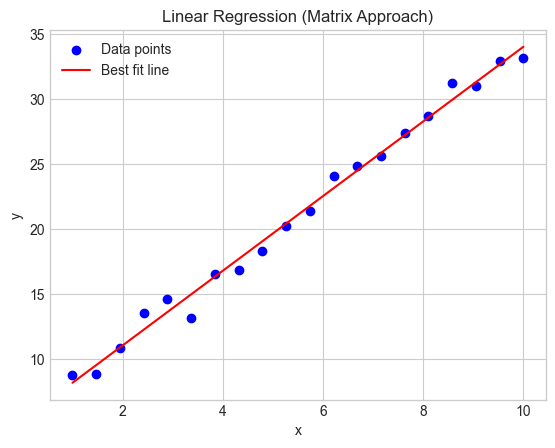

In [49]:
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Best fit line')
plt.title("Linear Regression (Matrix Approach)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()